In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt


# Data Collection, Analysis and Processing

In [52]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [53]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [54]:
X_test.shape, Y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [55]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 --> airplane 1 --> automobile 2 --> bird 3 --> cat 4 --> deer 5 --> dog 6 --> frog 7 --> horse 8 --> ship 9 --> truck

In [56]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [57]:
X_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [58]:
# Reshape Y train into 1D array
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)
Y_train[:5], Y_test[:5]

(array([6, 9, 9, 4, 1], dtype=uint8), array([3, 8, 8, 0, 6], dtype=uint8))

In [59]:
# Target Classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [60]:
# Function to plot the image
def plt_image(X, Y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

In [61]:
Y_train[0]

6

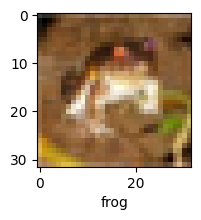

In [62]:
plt_image(X_train, Y_train, 0)

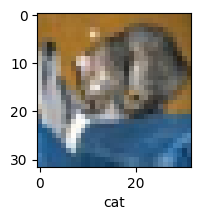

In [63]:
plt_image(X_test, Y_test, 0)

In [64]:
# Normalize the X_train and X_test
X_train = X_train/255
X_test = X_test/255

In [65]:
X_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

In [66]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

## Model BUilding using Artificial Neural Network

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics =['accuracy']
)

# use "categorical_crossentropy" whenever one-hot-encoding is performed,
# If classes is in form of direct values then we use "sparse_categorical_crossentropy"
# in case of discrete values(0,1,2,..) use sparse cross entropy for calculating loss

model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 251s 160ms/step - loss: 1.8093 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 244s 156ms/step - loss: 1.6192 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 253s 162ms/step - loss: 1.5391 - accuracy: 0.4572
Epoch 4/5
1563/1563 [==============================] - 248s 158ms/step - loss: 1.4779 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 257s 164ms/step - loss: 1.4268 - accuracy: 0.4984


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 dense_2 (Dense)             (None, 10)                30010     
                                                                 
Total params: 18252010 (69.63 MB)
Trainable params: 18252010 (69.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Test data
model.evaluate(X_test, Y_test)

313/313 [==============================] - 19s 55ms/step - loss: 1.4432 - accuracy: 0.4894


[1.4431711435317993, 0.4893999993801117]

In [26]:
# Printing the classification report

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_class))

313/313 [==============================] - 18s 56ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.59      0.55      1000
           1       0.60      0.65      0.62      1000
           2       0.41      0.28      0.34      1000
           3       0.41      0.22      0.29      1000
           4       0.40      0.47      0.43      1000
           5       0.40      0.40      0.40      1000
           6       0.54      0.50      0.52      1000
           7       0.46      0.67      0.55      1000
           8       0.52      0.70      0.60      1000
           9       0.65      0.41      0.50      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



## Model Building using CNN

In [67]:
cnn_model = models.Sequential([
    #cnn layer
     # Convoluational Layer
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32,3)),
    layers.MaxPooling2D((2,2)), # Pooling Layer
    # Convoluational Layer
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32,3)),
    layers.MaxPooling2D((2,2)), # Pooling Layer


    # dense Network
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation = "softmax")
])

# Softmax is used to normalized the output by
# dividing output class probability with total probability of all the Target classes


In [68]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [70]:
# Compile the model
cnn_model.compile(optimizer = 'SGD',
    loss = "sparse_categorical_crossentropy",
    metrics =['accuracy']
)

cnn_model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.0701 - accuracy: 0.2377
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6955 - accuracy: 0.3861
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4864 - accuracy: 0.4613
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3701 - accuracy: 0.5109
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.2834 - accuracy: 0.5454
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2131 - accuracy: 0.5704
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1505 - accuracy: 0.5938
Epoch 8/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0983 - accuracy: 0.6133
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0533 - accuracy: 0.6292
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [71]:
cnn_model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0547 - accuracy: 0.6357


[1.0546618700027466, 0.635699987411499]

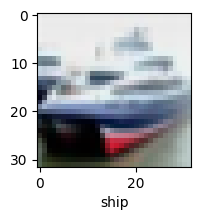

In [73]:
# PLotting a image
plt_image(X_test, Y_test, 1)

In [74]:
# Performing the prediction
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn[:5]

313/313 [==============================] - 5s 15ms/step


array([[4.4042836e-03, 3.7699990e-04, 2.1163758e-02, 7.8940701e-01,
        8.6371806e-03, 8.2369253e-02, 2.7568381e-02, 1.1591237e-03,
        6.4401276e-02, 5.1274506e-04],
       [3.3865467e-01, 4.8931560e-01, 6.1809522e-04, 1.5352965e-05,
        5.4762553e-04, 5.0411268e-06, 1.6367649e-05, 8.9269952e-06,
        1.3950874e-01, 3.1309649e-02],
       [8.9779682e-02, 2.6605147e-01, 7.0736576e-03, 3.1400018e-03,
        1.0437651e-02, 1.0368659e-03, 1.0293450e-03, 6.0237199e-04,
        5.8466613e-01, 3.6182810e-02],
       [5.8631313e-01, 2.2359302e-02, 1.9747570e-02, 1.2264505e-03,
        1.4180820e-02, 2.9279233e-04, 1.4322308e-03, 2.7690228e-04,
        3.4922090e-01, 4.9498840e-03],
       [1.8228745e-04, 8.2311541e-05, 3.3641174e-02, 5.1976498e-02,
        7.8848803e-01, 1.6094292e-02, 1.0816039e-01, 1.1658766e-03,
        1.7172450e-04, 3.7394802e-05]], dtype=float32)

In [77]:
y_class_cnn = [np.argmax(element) for element in y_pred_cnn]
y_class_cnn[:5]

[3, 1, 8, 0, 4]

In [78]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

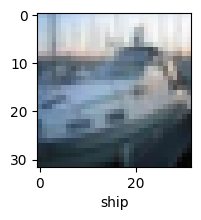

In [83]:
# PLotting a image
plt_image(X_test, Y_test, 2)

In [84]:
classes[y_class_cnn[2]]

'ship'

In [87]:
print("CLassification Report: \n", classification_report(Y_test, y_class_cnn))

CLassification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.68      0.82      0.74      1000
           2       0.58      0.45      0.50      1000
           3       0.48      0.44      0.46      1000
           4       0.49      0.70      0.57      1000
           5       0.59      0.47      0.52      1000
           6       0.66      0.79      0.72      1000
           7       0.71      0.69      0.70      1000
           8       0.82      0.67      0.74      1000
           9       0.73      0.61      0.67      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000

